Proyek Bangkit Hans
Klasifikasi tingkat kematangan buah pisang menggunakan CNN dan fine tuning

In [5]:
# Extract File

from zipfile import ZipFile

with ZipFile("C:\Data D\Latihan\Teman\Proyek Bangkit_hans\drive-download-20231129T142403Z-001.zip", 'r') as zObject:
    zObject.extractall( 
        path="C:\Data D\Latihan\Teman\Proyek Bangkit_hans\Dataset") 

In [1]:
import os
base_dir = os.path.basename('\Dataset')

In [2]:
kelas = os.listdir(base_dir)
kelas

['Busuk', 'Kurang Matang', 'Matang']

Import Library

In [3]:
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import tensorflow as tf

EDA

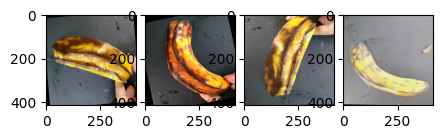

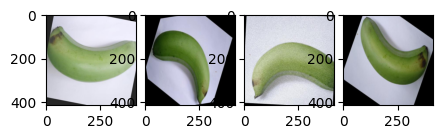

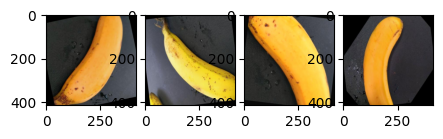

In [5]:
# Menampilkan random sample dari tiap kelas

Image_dir = base_dir
image_file = []
for subdir in os.listdir(Image_dir):
    subdir_path = os.path.join(Image_dir, subdir)
    if os.path.isdir(subdir_path):
        # Get all image files in the subdirectory
        images = [os.path.join(subdir_path, filename) for filename in os.listdir(subdir_path) if filename.endswith((".jpg", ".png", ".jpeg"))]
        # Randomly select 4 image files
        random_images = random.sample(images, 4)
        # Add the selected images to the list of image files
        image_file.extend(random_images)

    # Create a 2x3 grid for displaying the images
    fig, axes = plt.subplots(1, 4, figsize=(5, 5)) #(height, width) & (baris, kolom)
    for i, ax in enumerate(axes.flatten()):
        img = Image.open(random_images[i])
        ax.imshow(img)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

Pre-Processing

In [37]:
img_size = (224, 224) # VGG16 standar
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    validation_split = 0.3
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.3
)

In [38]:
# Generate the training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size= img_size,
    batch_size= 32,
    class_mode='categorical',
    subset='training')

# Generate the validation data
val_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size= img_size,
    batch_size= 32,
    class_mode='categorical',
    subset='validation')

Found 210 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


CNN

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(223, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 221, 222, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 110, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 109, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 93312)             0         
                                                                 
 dense_24 (Dense)            (None, 128)              

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [47]:
# callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
# checkpoint = keras.callbacks.ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_loss', save_best_only=True)

history = model.fit(
      train_generator,
      epochs=10,
      validation_data=val_generator,
      steps_per_epoch=len(train_generator)
    #   callbacks = [callback, checkpoint]
      )

Epoch 1/10
7/7 [==============================] - 8s 777ms/step - loss: 3.2251 - accuracy: 0.3714 - val_loss: 0.8076 - val_accuracy: 0.5333
Epoch 2/10
7/7 [==============================] - 5s 687ms/step - loss: 0.9355 - accuracy: 0.6286 - val_loss: 0.9884 - val_accuracy: 0.6556
Epoch 3/10
7/7 [==============================] - 5s 674ms/step - loss: 0.7807 - accuracy: 0.7000 - val_loss: 0.6336 - val_accuracy: 0.6111
Epoch 4/10
7/7 [==============================] - 5s 712ms/step - loss: 0.4949 - accuracy: 0.7476 - val_loss: 0.8441 - val_accuracy: 0.6444
Epoch 5/10
7/7 [==============================] - 5s 695ms/step - loss: 0.3767 - accuracy: 0.8381 - val_loss: 0.7154 - val_accuracy: 0.7111
Epoch 6/10
7/7 [==============================] - 6s 727ms/step - loss: 0.3510 - accuracy: 0.8095 - val_loss: 0.4559 - val_accuracy: 0.8111
Epoch 7/10
7/7 [==============================] - 5s 714ms/step - loss: 0.2941 - accuracy: 0.8333 - val_loss: 0.4645 - val_accuracy: 0.7000
Epoch 8/10
7/7 [====

In [49]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 124ms/step - loss: 0.3511 - accuracy: 0.8444
Test accuracy: 0.8444444537162781
